<a href="https://colab.research.google.com/github/Gcango/Startup_Unicornio_Analise_Financeira/blob/main/Startups_unicornes_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neste projecto foi objecto de analise diferentes Startups ("Unicórnio") e seus investidores. O termo "Unicórnio" é usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. As questões e suas respectivas respostas surgem no decorrer no Bloco de notas.



In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [245]:
dados = pd.read_csv("/content/unicorns till sep 2022.csv")

In [246]:
dados.sample(6)

KeyError: -1

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
279,Retool,$3.20,12/22/2021,United States,San Francisco,Internet software & services,Sequoia Capital
918,Red Ventures,$1,1/7/2015,United States,Fort Mill,Other,"Silver Lake Partners, General Atlantic"
1067,Agile Robots,$1,9/9/2021,Germany,Munich,Hardware,"Hillhouse Capital Management, Sequoia Capital ..."
105,Doctolib,$6.40,3/19/2019,France,Paris,Health,"BPI France, Kerala Ventures, Accel"
157,Cerebral,$4.80,6/10/2021,United States,San Francisco,Health,"Oak HC/FT Partners, Artis Ventures, WestCap Group"
51,Talkdesk,$10,10/3/2018,United States,San Francisco,Internet software & services,"DJF, Salesforce Ventures, Storm Ventures"


In [247]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [248]:
print(f" O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas")

 O dataset possui 1186 linhas e 7 colunas


In [249]:
#Renomeando as colunas do Dataset
dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [250]:
dados.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True)

In [251]:
dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investors         18
dtype: int64

In [252]:
#Verificando a o impacto do dados nulos Graficamenteno dataset

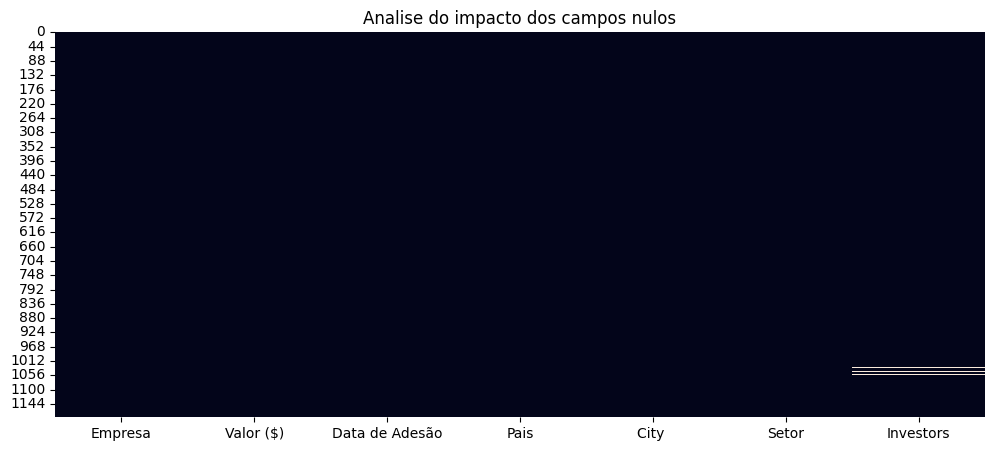

In [253]:
plt.figure(figsize=(12, 5))
plt.title("Analise do impacto dos campos nulos")
sns.heatmap(dados.isnull(), cbar=False);

In [254]:
#1) - Em termos numericos como podemos perceber a distribuição dos dados deste dataset?

In [255]:
estado = dados.nunique()
print(f"Em termos numericos podemos entender o dataser da seguinte forma: \n{estado}")

Em termos numericos podemos entender o dataser da seguinte forma: 
Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investors         1152
dtype: int64


In [256]:
print(f"A outra forma de podermos enteder o dataset é por meio da descrição:")
dados.describe()

A outra forma de podermos enteder o dataset é por meio da descrição:


KeyError: -1

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors
count,1186,1186,1186,1186,1186,1186,1168
unique,1183,222,695,48,286,34,1152
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,271,9,636,168,239,3


In [257]:
#2) - Quais sectores as Statups se aplicam mais?

In [258]:
dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [259]:
dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [260]:
#3) - Em termos % demostre 12 das areas melhores posicionadas?

In [261]:
graf_sector = dados['Setor'].value_counts(normalize = True).head(12)
print(f"Em termos % as 12 areas com mais bem posiocionadas são: \n{graf_sector.round(2)}")

Em termos % as 12 areas com mais bem posiocionadas são: 
Fintech                                0.20
Internet software & services           0.19
E-commerce & direct-to-consumer        0.09
Health                                 0.08
Artificial intelligence                0.06
Supply chain, logistics, & delivery    0.05
Other                                  0.05
Cybersecurity                          0.05
Data management & analytics            0.04
Auto & transportation                  0.03
Hardware                               0.03
Mobile & telecommunications            0.03
Name: Setor, dtype: float64


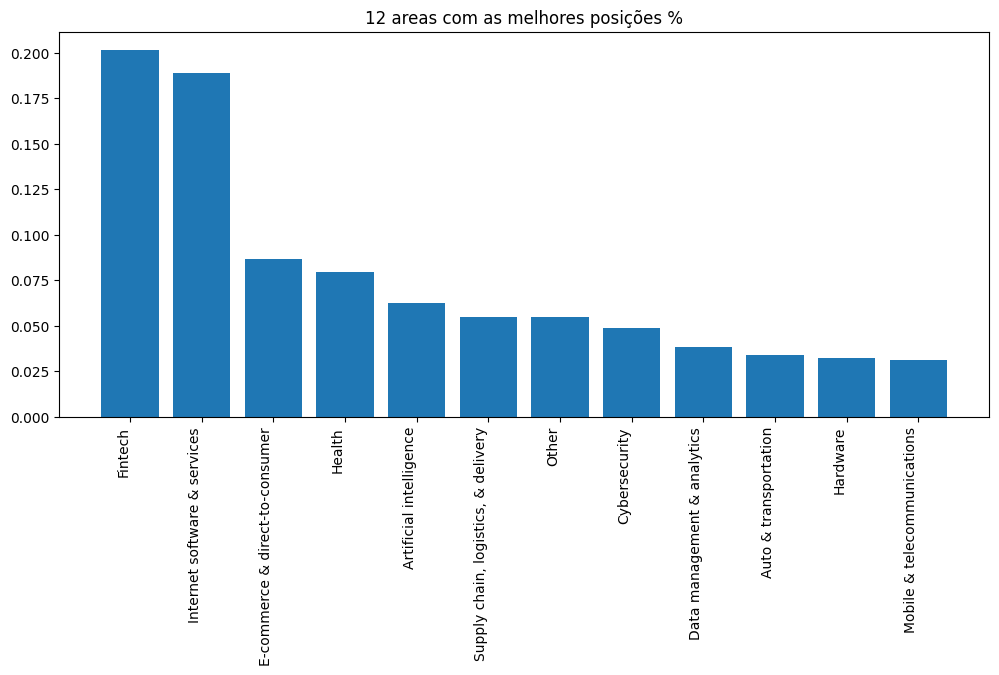

In [262]:
plt.figure( figsize=(12,5) )
plt.title('12 areas com as melhores posições %')
plt.bar( graf_sector.index, graf_sector.values)
plt.xticks( rotation=90, ha='right' );

In [263]:
#4) - De igual modo, faça uma listagem em % que representa a distribuição das Startups por paises?

In [264]:
dados.columns

Index(['Empresa', 'Valor ($)', 'Data de Adesão', 'Pais', 'City ', 'Setor',
       'Investors'],
      dtype='object')

In [265]:
pais_statup = round(dados['Pais'].value_counts(normalize= True) * 100, 2).head(12)
#data = pd.DataFrame(pais_statup)
#data
pais_statup

United States     53.63
China             14.67
India              5.90
United Kingdom     3.88
Germany            2.45
France             2.02
Israel             1.85
Canada             1.60
Brazil             1.43
South Korea        1.43
Singapore          1.10
Sweden             0.67
Name: Pais, dtype: float64

In [266]:
#4) - Imprima 12 paises bem posicionados no que tange ao numero de Startups?

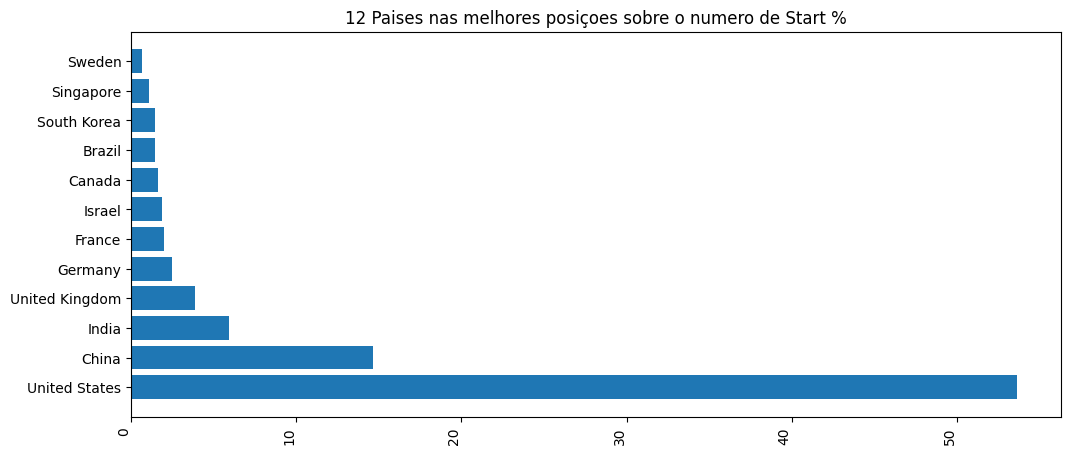

In [267]:
plt.figure( figsize=(12,5) )
plt.title('12 Paises nas melhores posiçoes sobre o numero de Start %')
plt.barh( pais_statup.index, pais_statup.values,)
plt.xticks( rotation=90, ha='right' );

In [268]:
#4) - Qual é o periodo de avaliação deste dataset?

In [269]:
dados['Data de Adesão'].value_counts()

7/13/2021     9
11/10/2021    7
2/22/2022     7
9/15/2021     7
3/16/2021     6
             ..
9/30/2019     1
6/25/2019     1
2/11/2022     1
3/30/2020     1
7/27/2022     1
Name: Data de Adesão, Length: 695, dtype: int64

In [270]:
dados['Data de Adesão'] = pd.to_datetime(dados['Data de Adesão'])
dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [271]:
dados['Mes'] = pd.DatetimeIndex(dados['Data de Adesão']).month
dados['Ano'] = pd.DatetimeIndex(dados['Data de Adesão']).year
dados.head()

KeyError: -1

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investors,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [272]:
ano_bd = dados['Ano'].unique()

data = pd.Series(ano_bd).sort_values()
print(f"O periodo de avaliação deste dataset é de 13 anos. O seu periodo vai de: \n{data}")

O periodo de avaliação deste dataset é de 13 anos. O seu periodo vai de: 
12    2007
11    2011
1     2012
10    2013
3     2014
8     2015
6     2016
0     2017
2     2018
4     2019
9     2020
5     2021
7     2022
dtype: int64


In [273]:
#5) - Faça uma analise da quantidade e surgimento das startup mencionando o seu Pais, Ano, Mês.

In [274]:
dados.columns

Index(['Empresa', 'Valor ($)', 'Data de Adesão', 'Pais', 'City ', 'Setor',
       'Investors', 'Mes', 'Ano'],
      dtype='object')

In [275]:
#analise_startup = dados.groupby(by = ['Pais', 'Ano', 'Mes', 'Empresa']).count()['Ano']
#analise_startup

analise_startup = dados.groupby(['Pais','Ano','Mes', 'Empresa'])['Setor'].count().reset_index()
analise_startup

,Pais,Ano,Mes,Empresa,Setor
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1
1184,Vietnam,2021,10,Sky Mavis,1


In [276]:
#5) - Na analise feita acima, tenta avaliar 3 paises dos PALOPES (Espanha,Brazil e India) sobre o surgimento das Startup.

In [277]:
Sp = analise_startup.loc[analise_startup['Pais'] == 'Spain']
Sp

,Pais,Ano,Mes,Empresa,Setor
476,Spain,2018,1,Cabify,1
477,Spain,2021,12,Jobandtalent,1
478,Spain,2022,1,TravelPerk,1
479,Spain,2022,6,Recover,1


In [278]:
Br = analise_startup.loc[analise_startup['Pais'] == 'Brazil']
Br

,Pais,Ano,Mes,Empresa,Setor
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [279]:
In = analise_startup.loc[analise_startup['Pais'] == 'India']
In

,Pais,Ano,Mes,Empresa,Setor
303,India,2014,5,Snapdeal,1
304,India,2014,10,Ola Cabs,1
305,India,2014,12,InMobi,1
306,India,2017,7,BYJU's,1
307,India,2018,6,Swiggy,1
...,...,...,...,...,...
368,India,2022,6,LeadSquared,1
369,India,2022,6,PhysicsWallah,1
370,India,2022,6,Purplle,1
371,India,2022,7,OneCard,1


In [280]:
#6) - Faça uma analise das Startup por setor e pais.

In [281]:
analise_area = dados.groupby(['Empresa','Setor','Pais'])['Ano'].count().reset_index()
analise_area

,Empresa,Setor,Pais,Ano
0,0x,Fintech,United States,1
1,1047 Games,Internet software & services,United States,1
2,1KMXC,Hardware,China,1
3,1Password,Cybersecurity,Canada,1
4,4Paradigm,Artificial intelligence,China,1
...,...,...,...,...
1181,reddit,Internet software & services,United States,1
1182,solarisBank,Fintech,Germany,1
1183,stori,Fintech,Mexico,1
1184,thatgamecompany,Internet software & services,United States,1


In [282]:
analise = dados[['Setor','Pais']].value_counts(ascending=False)
analise.head(20)

Setor                                Pais          
Internet software & services         United States     162
Fintech                              United States     129
Health                               United States      70
Cybersecurity                        United States      45
Artificial intelligence              United States      45
Data management & analytics          United States      35
Other                                United States      34
E-commerce & direct-to-consumer      China              28
Fintech                              United Kingdom     27
E-commerce & direct-to-consumer      United States      26
Supply chain, logistics, & delivery  United States      25
Auto & transportation                China              19
Hardware                             China              18
E-commerce & direct-to-consumer      India              17
Fintech                              India              17
Artificial intelligence              China              15
Inte

In [283]:
#8) Faça uma analise Financeira das Startup

In [284]:
dados['Valor ($)']

0       $140
1       $127
2       $100
3        $95
4        $40
        ... 
1181      $1
1182      $1
1183      $1
1184      $1
1185      $1
Name: Valor ($), Length: 1186, dtype: object

In [285]:
#transformando a coluna em numerico
dados['Valor ($)'] = pd.to_numeric(dados['Valor ($)'].apply(lambda Linha: Linha.replace('$', '')))
dados['Valor ($)']

0       140.0
1       127.0
2       100.0
3        95.0
4        40.0
        ...  
1181      1.0
1182      1.0
1183      1.0
1184      1.0
1185      1.0
Name: Valor ($), Length: 1186, dtype: float64

In [286]:
dados_fin = dados.groupby('Pais').sum()['Valor ($)'].reset_index()
dados_fin

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95
5,Bermuda,1.60
6,Brazil,40.08
7,Canada,49.23
8,Chile,2.50
9,China,678.59


In [289]:
dados_fin = dados_fin.sort_values('Valor ($)', ascending=False)
graf_final = dados_fin.head(10)
graf_final

,Pais,Valor ($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,48.02
6,Brazil,40.08


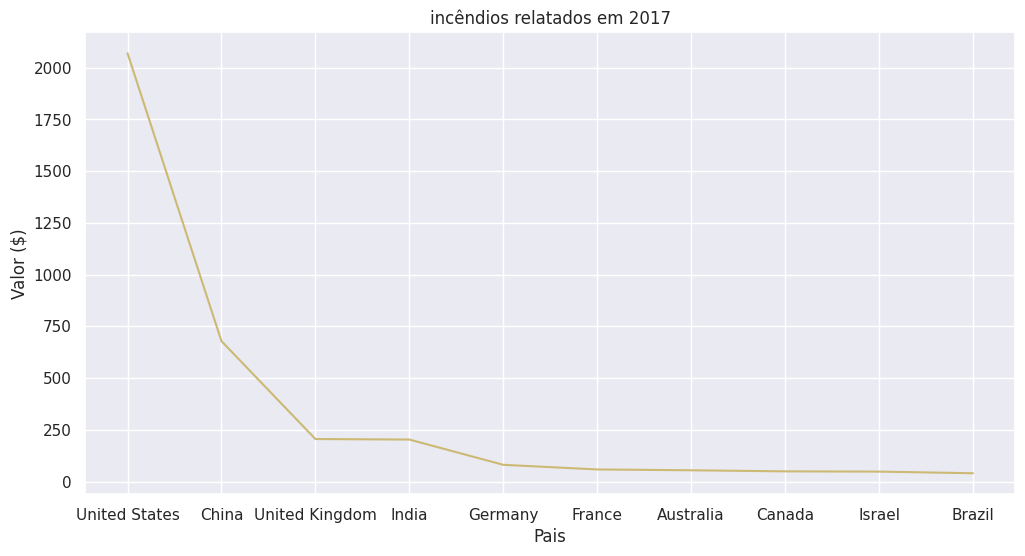

In [290]:
plt.figure(figsize=(12,6))
#plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
plt.title('incêndios relatados em 2017')
sns.lineplot(data=graf_final, x='Pais', y='Valor ($)', color='y' )
plt.show()